In [1]:
import io
import pathlib
import requests
import zipfile

import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
pd.options.display.max_colwidth = 75
pd.options.display.max_columns = 20
np.set_printoptions(precision=4, suppress=True)

In [2]:
ROOT_DIR = pathlib.Path("..")

DATASETS_URL = "https://github.com/KAUST-Academy/python-for-data-analysis/raw/moi-bridging-program-cohort-2/datasets.zip"
EXAMPLES_URL = "https://github.com/KAUST-Academy/python-for-data-analysis/raw/moi-bridging-program-cohort-2/examples.zip"

response = requests.get(DATASETS_URL)
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall(ROOT_DIR)


response = requests.get(EXAMPLES_URL)
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall(ROOT_DIR)


In [3]:
DATASETS_DIR = ROOT_DIR / "datasets"
EXAMPLES_DIR = ROOT_DIR / "examples"


In [4]:
!ls $DATASETS_DIR

babynames  bitly_usagov  fec  haiti  movielens	mta_perf  titanic  usda_food


In [5]:
!ls $EXAMPLES_DIR

array_ex.txt	ex4.csv			    ipython_bug.py  test_file.csv
csv_mindex.csv	ex5.csv			    macrodata.csv   tips.csv
ex1.csv		ex6.csv			    segismundo.txt  tseries.csv
ex1.xlsx	ex7.csv			    spx.csv	    volume.csv
ex2.csv		example.json		    stinkbug.png    yahoo_price.pkl
ex3.txt		fdic_failed_bank_list.html  stock_px.csv    yahoo_volume.pkl


In [6]:
!cat $EXAMPLES_DIR/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [7]:
df = pd.read_csv(EXAMPLES_DIR / "ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
!cat $EXAMPLES_DIR/ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [9]:
pd.read_csv(EXAMPLES_DIR / "ex2.csv", header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
pd.read_csv(EXAMPLES_DIR / "ex2.csv", names=["a", "b", "c", "d", "message"])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
names = ["a", "b", "c", "d", "message"]
pd.read_csv(EXAMPLES_DIR / "ex2.csv", names=names, index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [12]:
!cat $EXAMPLES_DIR/csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [13]:
parsed = pd.read_csv(EXAMPLES_DIR / "csv_mindex.csv",
                     index_col=["key1", "key2"])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [14]:
!cat $EXAMPLES_DIR/ex3.txt

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


In [15]:
result = pd.read_csv(EXAMPLES_DIR / "ex3.txt", sep="\s+")
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [16]:
!cat $EXAMPLES_DIR/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [17]:
pd.read_csv(EXAMPLES_DIR / "ex4.csv", skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [18]:
!cat $EXAMPLES_DIR/ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

In [19]:
result = pd.read_csv(EXAMPLES_DIR / "ex5.csv")
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [20]:
pd.isna(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [21]:
result = pd.read_csv(EXAMPLES_DIR / "ex5.csv", na_values=["NULL"])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [22]:
result2 = pd.read_csv(EXAMPLES_DIR / "ex5.csv", keep_default_na=False)
result2

,something,a,b,c,d,message
0,one,1,2,3,4,NA
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [23]:
result2.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [24]:
result3 = pd.read_csv(EXAMPLES_DIR / "ex5.csv", keep_default_na=False,
                      na_values=["NA"])
result3

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [25]:
result3.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [ ]:
sentinels = {"message": ["foo", "NA"], "something": ["two"]}
pd.read_csv(EXAMPLES_DIR / "ex5.csv", na_values=sentinels,
            keep_default_na=False)

In [ ]:
pd.options.display.max_rows = 10

In [ ]:
result = pd.read_csv(EXAMPLES_DIR / "ex6.csv")
result

In [26]:
pd.read_csv(EXAMPLES_DIR / "ex6.csv", nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [27]:
chunker = pd.read_csv(EXAMPLES_DIR / "ex6.csv", chunksize=1000)
type(chunker)

pandas.io.parsers.readers.TextFileReader

In [28]:
chunker = pd.read_csv(EXAMPLES_DIR / "ex6.csv", chunksize=1000)

tot = pd.Series([], dtype='int64')
for piece in chunker:
    tot = tot.add(piece["key"].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)

In [29]:
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

In [30]:
data = pd.read_csv(EXAMPLES_DIR / "ex5.csv")
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [31]:
data.to_csv(EXAMPLES_DIR / "out.csv")

In [32]:
!cat $EXAMPLES_DIR/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [ ]:
import sys

data.to_csv(sys.stdout, sep="|")

In [ ]:
data.to_csv(sys.stdout, na_rep="NULL")

In [ ]:
data.to_csv(sys.stdout, index=False, header=False)

In [ ]:
data.to_csv(sys.stdout, index=False, columns=["a", "b", "c"])

In [ ]:
!cat $EXAMPLES_DIR/ex7.csv

In [ ]:
import csv

f = open(EXAMPLES_DIR / "ex7.csv")
reader = csv.reader(f)

In [ ]:
for line in reader:
    print(line)
f.close()

In [ ]:
with open(EXAMPLES_DIR / "ex7.csv") as f:
    lines = list(csv.reader(f))

In [ ]:
header, values = lines[0], lines[1:]

In [ ]:
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

In [33]:
obj = """
{"name": "Wes",
 "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
              {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
"""

In [34]:
import json

result = json.loads(obj)
result

{'name': 'Wes',
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

In [35]:
asjson = json.dumps(result)
asjson

'{"name": "Wes", "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"], "pet": null, "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]}, {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]}'

In [36]:
siblings = pd.DataFrame(result["siblings"], columns=["name", "age"])
siblings

,name,age
0,Scott,34
1,Katie,42


In [37]:
!cat $EXAMPLES_DIR/example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [38]:
data = pd.read_json(EXAMPLES_DIR / "example.json")
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
data.to_json(sys.stdout)
data.to_json(sys.stdout, orient="records")

In [39]:
tables = pd.read_html(EXAMPLES_DIR / "fdic_failed_bank_list.html")
print(len(tables))
failures = tables[0]
failures.head()

1


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [41]:
close_timestamps = pd.to_datetime(failures["Closing Date"])
close_timestamps.dt.year.value_counts().sort_index()


2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
Name: Closing Date, dtype: int64

In [ ]:
from lxml import objectify

path = DATASETS_DIR / "mta_perf/Performance_MNR.xml"
with open(path) as f:
    parsed = objectify.parse(f)
root = parsed.getroot()

In [ ]:
data = []

skip_fields = ["PARENT_SEQ", "INDICATOR_SEQ",
               "DESIRED_CHANGE", "DECIMAL_PLACES"]

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [ ]:
perf = pd.DataFrame(data)
perf.head()

In [ ]:
perf2 = pd.read_xml(path)
perf2.head()

In [ ]:
frame = pd.read_csv(EXAMPLES_DIR / "ex1.csv")
print(frame)
frame.to_pickle(EXAMPLES_DIR / "frame_pickle")

In [ ]:
pd.read_pickle(EXAMPLES_DIR / "frame_pickle")

In [ ]:
!rm $EXAMPLES_DIR/frame_pickle

In [ ]:
fec = pd.read_parquet(DATASETS_DIR / 'fec/fec.parquet')

In [42]:
xlsx = pd.ExcelFile(EXAMPLES_DIR / "ex1.xlsx")

In [43]:
xlsx.sheet_names

['Sheet1']

In [44]:
xlsx.parse(sheet_name="Sheet1")

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [ ]:
xlsx.parse(sheet_name="Sheet1", index_col=0)

In [45]:
frame = pd.read_excel(EXAMPLES_DIR / "ex1.xlsx", sheet_name="Sheet1")
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [46]:
writer = pd.ExcelWriter(EXAMPLES_DIR / "ex2.xlsx")
frame.to_excel(writer, "Sheet1")
writer.save()

<ipython-input-46-81adb06adfcc>:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [47]:
frame.to_excel(EXAMPLES_DIR / "ex2.xlsx")

In [ ]:
!rm $EXAMPLES_DIR/ex2.xlsx

In [ ]:
!rm -f $EXAMPLES_DIR/mydata.h5

In [ ]:
frame = pd.DataFrame({"a": np.random.standard_normal(100)})
store = pd.HDFStore(EXAMPLES_DIR / "mydata.h5")
store["obj1"] = frame
store["obj1_col"] = frame["a"]
store

In [ ]:
store["obj1"]

In [ ]:
store.put("obj2", frame, format="table")
store.select("obj2", where=["index >= 10 and index <= 15"])
store.close()

In [ ]:
frame.to_hdf(EXAMPLES_DIR / "mydata.h5", "obj3", format="table")
pd.read_hdf(EXAMPLES_DIR / "mydata.h5", "obj3", where=["index < 5"])

In [ ]:
import os

os.remove(EXAMPLES_DIR / "mydata.h5")

In [ ]:
import requests

url = "https://api.github.com/repos/pandas-dev/pandas/issues"
resp = requests.get(url)
resp.raise_for_status()
resp

In [ ]:
data = resp.json()
data[0]["title"]

In [ ]:
issues = pd.DataFrame(data, columns=["number", "title",
                                     "labels", "state"])
issues

In [ ]:
import sqlite3

query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""

con = sqlite3.connect("mydata.sqlite")
con.execute(query)
con.commit()

In [ ]:
data = [("Atlanta", "Georgia", 1.25, 6),
        ("Tallahassee", "Florida", 2.6, 3),
        ("Sacramento", "California", 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

con.executemany(stmt, data)
con.commit()

In [ ]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()
rows

In [ ]:
cursor.description
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

In [ ]:
import sqlalchemy as sqla

db = sqla.create_engine("sqlite:///mydata.sqlite")
pd.read_sql("SELECT * FROM test", db)

In [ ]:
!rm mydata.sqlite

### Exercise

In [62]:
pd.read_csv?

In [66]:
path = "number-of-fishing-boats-in-the-arabian-gulf-and-the-red-sea-during-the-period-from-1996-to-2020.csv"
_df = pd.read_csv(
    path,
    header=None,
    usecols=[0, 1, 2, 3, 4],
    skiprows=[0, 1, 2, 3, 4],
    skipfooter=11,
    names=[
        (None, "Years"),
        ("Arabian Gulf", "Traditional"),
        ("Arabian Gulf", "Industrial"),
        ("Red Sea", "Traditional"),
        ("Red Sea", "Industrial"),
        ],
    engine="python"
)

In [68]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   (nan, Years)                 25 non-null     object
 1   (Arabian Gulf, Traditional)  25 non-null     int64 
 2   (Arabian Gulf, Industrial)   25 non-null     int64 
 3   (Red Sea, Traditional)       25 non-null     int64 
 4   (Red Sea, Industrial)        25 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [73]:
_df[(None, "Years")] = (_df.loc[:, (None, "Years")]
                           .str
                           .removesuffix(" *")
                           .astype(np.int64))

In [78]:
df = _df.set_index((None, "Years"))
df.index.name = "Years"

In [88]:
clean_df = (df.stack(level=[0, 1])
              .reorder_levels([1,2,0])
              .sort_index(level=[0, 1]))

In [89]:
clean_df

                           Years
Arabian Gulf  Industrial   1996       45
                           1997       40
                           1998       40
                           1999       34
                           2000       34
                                    ... 
Red Sea       Traditional  2016     6173
                           2017     7006
                           2018     8653
                           2019     8630
                           2020     8422
Length: 100, dtype: int64

<Axes: xlabel='Years'>

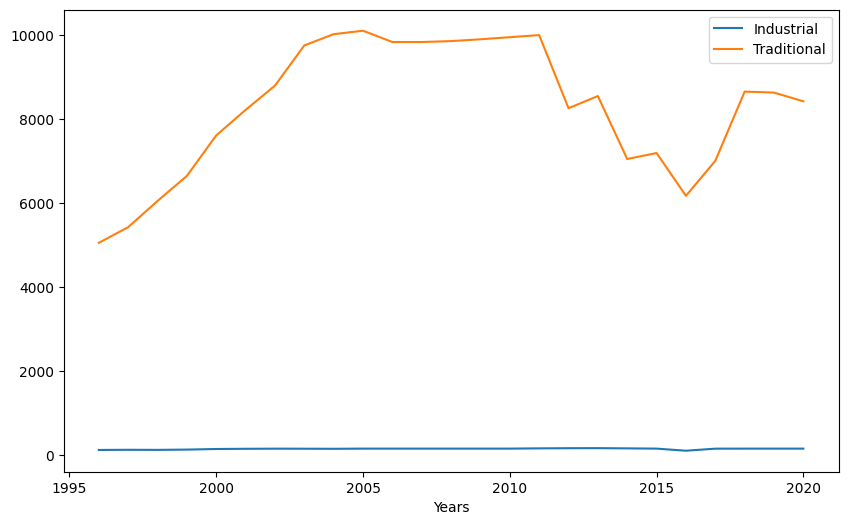

In [93]:
clean_df.loc["Red Sea"].unstack(level=0).plot()